<a href="https://colab.research.google.com/github/Kaber1a/Analysis-of-running-an-e-commerce-store-using-SQL/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDENT PERFORMANCE ANALYSIS AND PREDICTION BY KEVIN MUNYA ** **


***PROBLEM SOLVING***

In this study, I have only 2 problems at hand:

1.Determining how factors such as Study Hours Per week, Attendance Rate, Previous Grades, Participation in Extracurricular Activities ana Parent Education Level impact the performance of a student.

2.Structure and build a predictive model that will be able to predict the performance of a student





DATA LOADING

In [6]:
import pandas as pd
fp = pd.read_csv("/content/student_performance_prediction.csv")
fp

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


I have imported the necessary libraries to read the data set, then displayed the data set.

DATA UNDERSTADING

In [7]:
fp.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


I have displayed the first few rows of the data set just to have a clear view of the data set

In [8]:
fp.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


I have displayed the last few rows of the data set

In [9]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


I am identifying the data size, the data stypes present in the data set and the structure of the data set. The data set contains both textual and non textual data types. The size of the data set is 2.1 MB and the structure of the business is made up of 4,000 rows and 7 columns.

DATA CLEANING

In [10]:
fp.isnull()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False
39998,False,False,False,True,False,False,False


I am checking for any missing values in thed data set. I have confirmed there are may missing values which are represented by 'True'. I must work on the missing values before further analysis of thed data set.

In [11]:
fp.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


This represents the number of missing values per column in the data set.

In [12]:
fp.dropna(inplace=True)

I have dropped the missing values from the data set thus the data set has no missing  values

In [13]:
fp.isnull().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0


I have confirmed that there are no missing values in each and every column of the data set.

In [14]:
fp.duplicated().sum()

0

I was checking for any duplicated rows in the data set which happens there are 0 duplicated rows

In [15]:
completeness = fp.notnull().sum() / len(fp)
completeness

,0
Student ID,1.0
Study Hours per Week,1.0
Attendance Rate,1.0
Previous Grades,1.0
Participation in Extracurricular Activities,1.0
Parent Education Level,1.0
Passed,1.0


I have confirmed that our cleaned data set is complete for exploratory data aalysis.

In [16]:
numeric_columns = [
    'Student ID'	,
    'Study Hours per Week'	,
    'Attendance Rate'	,

    'Participation in Extracurricular Activities'	,
    'Parent Education Level'	,
    'Passed'

   ]

numeric_fp= fp [numeric_columns]
numeric_fp

,Student ID,Study Hours per Week,Attendance Rate,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,No,High School,No
3,S00004,17.6,76.8,Yes,Bachelor,No
4,S00005,8.8,89.3,No,Master,No
5,S00006,8.8,73.8,Yes,High School,Yes
6,S00007,17.9,38.6,No,Doctorate,Yes
...,...,...,...,...,...,...
39994,S39995,5.1,92.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,Yes,Master,No
39996,S39997,11.3,66.4,No,Doctorate,Yes
39997,S39998,13.1,65.6,No,Bachelor,No


I have converted the data types in the data set into numeric so that i can easily visualize the data set during the Exploratoty Data Analysis.

EXPLORATORY DATA ANALYSIS

In [17]:
numeric_fp.describe()

,Study Hours per Week,Attendance Rate
count,29446.000000,29446.000000
mean,9.964953,75.308582
std,5.025682,20.399216
min,-9.200000,-14.300000
25%,6.600000,61.600000
50%,10.000000,75.300000
75%,13.400000,88.800000
max,32.400000,150.200000


This is the summary statistics of the whole data set per numeric column.

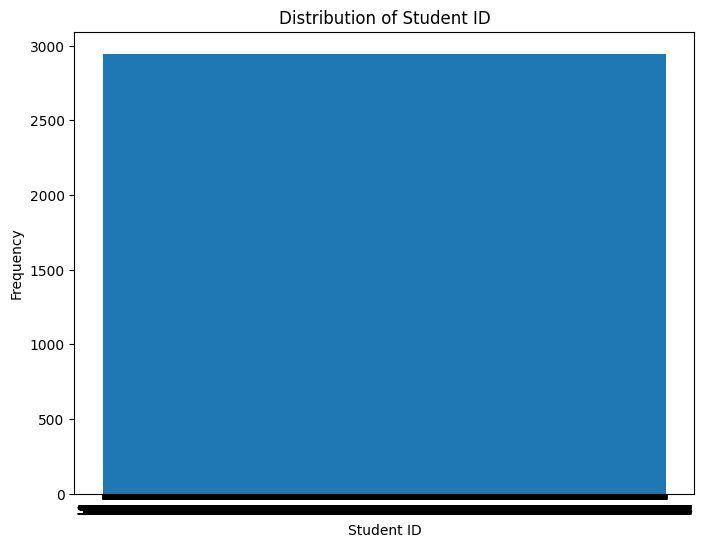

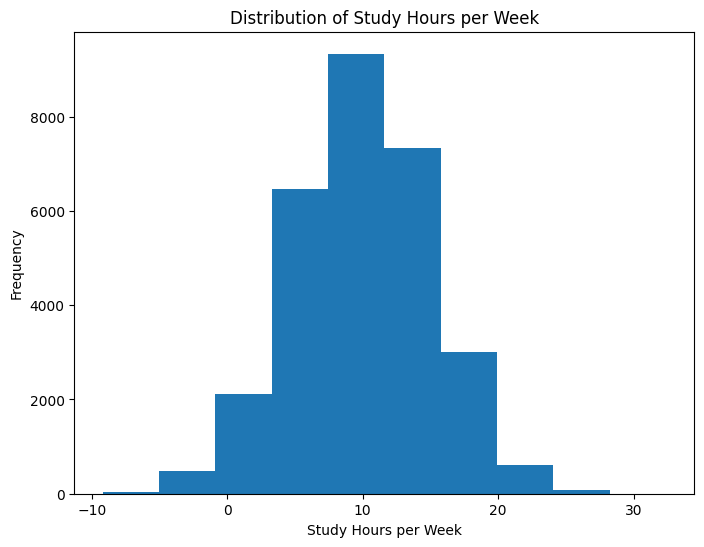

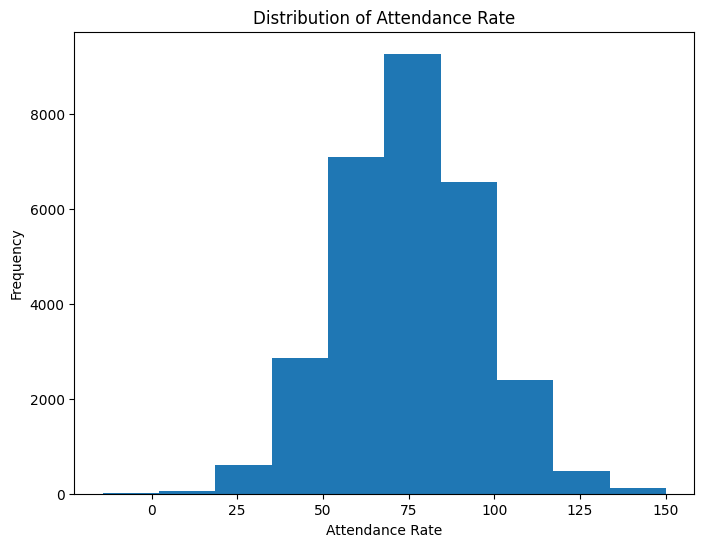

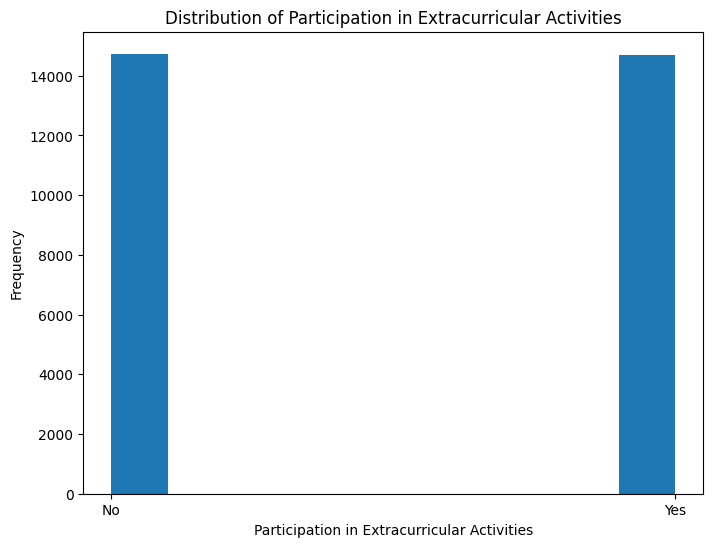

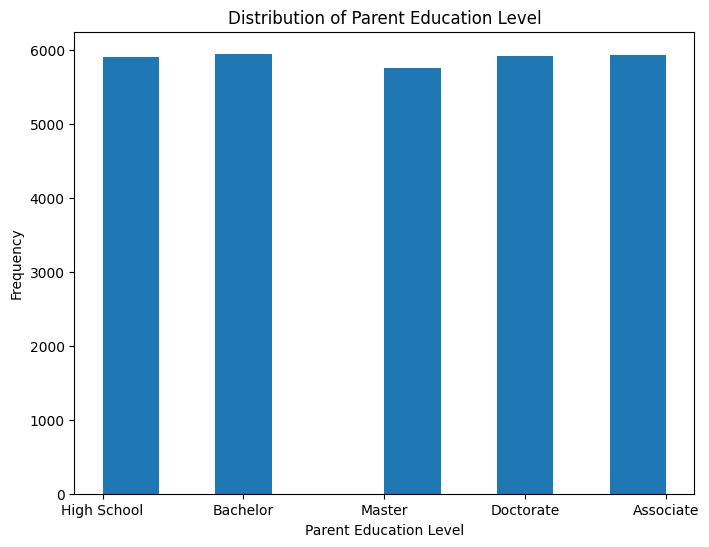

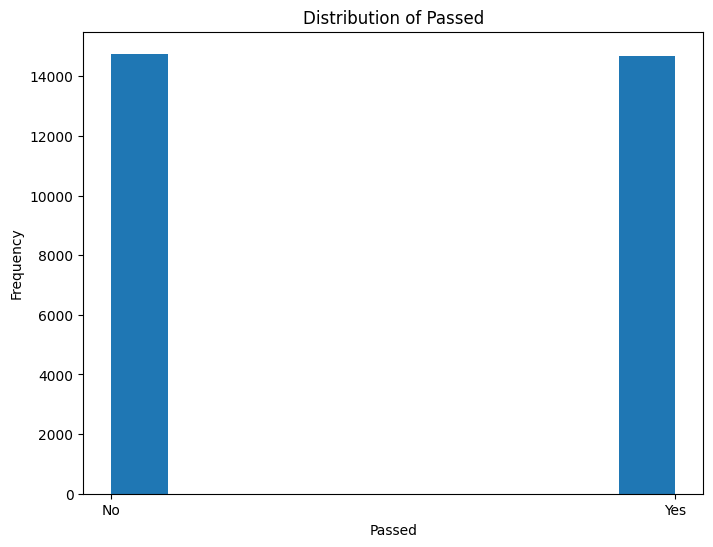

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numeric_fp:
  plt.figure(figsize=(8,6))
  plt.hist(numeric_fp[col], bins=10)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

I have displayed a histogram to represent the distribution of the values in various columns of the data set

In [19]:
import seaborn as sns
import matplotlib as plt
numeric_fp.select_dtypes(include=['number']).corr()

,Study Hours per Week,Attendance Rate
Study Hours per Week,1.000000,0.006096
Attendance Rate,0.006096,1.000000


This represents how different columns in the data set inter-relate

<function matplotlib.pyplot.show(close=None, block=None)>

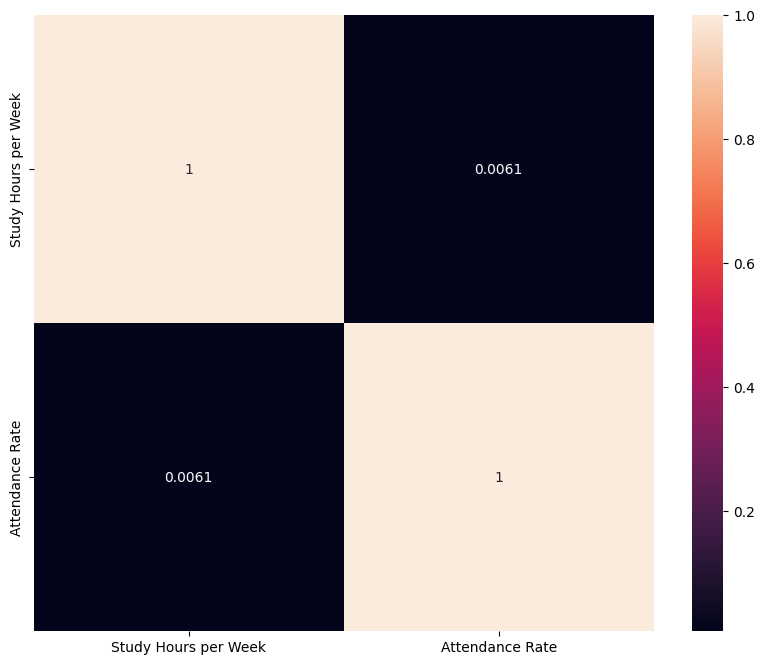

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure (figsize=(10,8))
sns.heatmap(numeric_fp.select_dtypes(include=['number']).corr(), annot=True)
plt.show

This is a visual represetation of the correlation matrix. Study hours per week relate weekly to the attendance rate at 0.61% hence showing that study hours per week has no relation with the attendance rate.

**MODELLING**

LOADING THE DATA SET

In [22]:
fp = pd.read_csv("/content/student_performance_prediction.csv")
fp

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [23]:
fp.dropna()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No


Machine learning algorithims can't handle missing values thus the need to drop the missing values

TRANSFORM DATA


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fp[['Study Hours per WeekT',	'Attendance RateT'	,'Previous GradesT'	]]= scaler.fit_transform(fp[['Study Hours per Week',	'Attendance Rate'	,'Previous Grades']])
fp

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,Study Hours per WeekT,Attendance RateT,Previous GradesT
0,S00001,12.5,NaN,75.0,Yes,Master,Yes,0.504316,NaN,0.579286
1,S00002,9.3,95.3,60.6,No,High School,No,-0.131730,0.981882,-0.293288
2,S00003,13.2,NaN,64.0,No,Associate,No,0.643450,NaN,-0.087264
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No,1.518013,0.074715,-0.184217
4,S00005,8.8,89.3,72.7,No,Master,No,-0.231112,0.687666,0.439916
...,...,...,...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No,1.120484,0.908328,-0.850766
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes,0.265799,-0.435260,-0.075145
39997,S39998,13.1,65.6,38.1,No,Bachelor,No,0.623574,-0.474489,-1.656685
39998,S39999,14.1,74.9,NaN,Yes,Master,No,0.822338,-0.018453,NaN


I have transformed the data through standardising it.The transformed columns are represented by 'T' at the end of the column

---



---



CLUSTERING THE DATA

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def optimise_k_means(data, max_k):
   clusters=[]
   inertias =[]

   for k in range (1, max_k ):
    kmeans = KMeans(n_clusters=k,)
    KMeans.fit(data)

    clusters.append(k)
    inertias.append(kmeans.inertia_)


   plt.subplots(figsize=(10,6))
   plt.plot(clusters, inertias, '-o')
   plt.xlabel('clusters')
   plt.ylabel('inertia')
   plt.title('Elbow Method for Optimal k')
   plt.show()

   optimise_k_means(fp[['Study Hours per WeekT',	'Attendance RateT'	,'Previous GradesT']], 10)


I want to determine the best number of clusters to use for this data

In [26]:
fp.dropna(inplace=True)

In [27]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=3)
KMeans.fit(fp[['Study Hours per WeekT',	'Attendance RateT'	,'Previous GradesT']])
fp['kmeans_3'] = KMeans.labels_
fp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,Study Hours per WeekT,Attendance RateT,Previous GradesT,kmeans_3
1,S00002,9.3,95.3,60.6,No,High School,No,-0.131730,0.981882,-0.293288,0
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No,1.518013,0.074715,-0.184217,2
4,S00005,8.8,89.3,72.7,No,Master,No,-0.231112,0.687666,0.439916,0
5,S00006,8.8,73.8,69.3,Yes,High School,Yes,-0.231112,-0.072393,0.233892,1
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes,1.577642,-1.798463,1.706360,2
...,...,...,...,...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No,-0.966539,0.824967,-1.171922,0
39995,S39996,15.6,93.8,51.4,Yes,Master,No,1.120484,0.908328,-0.850766,0
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes,0.265799,-0.435260,-0.075145,2
39997,S39998,13.1,65.6,38.1,No,Bachelor,No,0.623574,-0.474489,-1.656685,2


I have selected the number of clusters that I will use to be three(3).


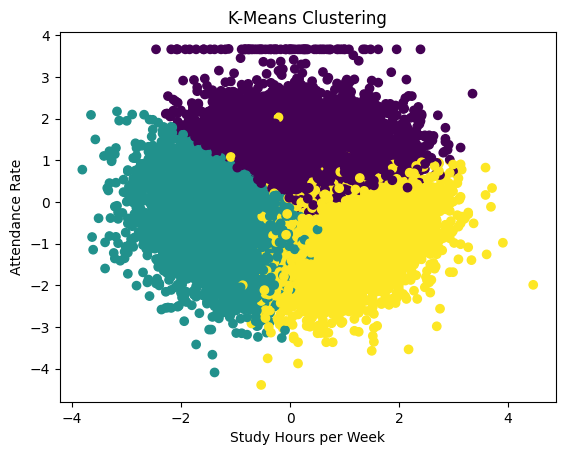

In [28]:
plt.scatter(x=fp['Study Hours per WeekT'], y=fp['Attendance RateT'], c=fp['kmeans_3'])
plt.xlabel('Study Hours per Week')
plt.ylabel('Attendance Rate')
plt.title('K-Means Clustering')
plt.show()

  I have visualized the results after using 3 clusters to divide my data set.

**LINEAR REGRESSION**

I want to build a predictive model which will now predict whether a student will pass or Fail depending on factors under investigation which are: Study Hours Per Week, Attendance Rate and Previous Grade

In [29]:
from sklearn.model_selection import train_test_split
X = fp.drop(['Passed','Participation in Extracurricular Activities','Parent Education Level'], axis =1)
y = fp['Passed']


I want to split, train and test my data set to determine the accuracy of the model during prediction. The dependent variable which is to be predicted is 'passed' thus I have dropped the column passed form the data set named X, which is the independednt variable.

In [30]:
X


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Study Hours per WeekT,Attendance RateT,Previous GradesT,kmeans_3
1,S00002,9.3,95.3,60.6,-0.131730,0.981882,-0.293288,0
3,S00004,17.6,76.8,62.4,1.518013,0.074715,-0.184217,2
4,S00005,8.8,89.3,72.7,-0.231112,0.687666,0.439916,0
5,S00006,8.8,73.8,69.3,-0.231112,-0.072393,0.233892,1
6,S00007,17.9,38.6,93.6,1.577642,-1.798463,1.706360,2
...,...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,-0.966539,0.824967,-1.171922,0
39995,S39996,15.6,93.8,51.4,1.120484,0.908328,-0.850766,0
39996,S39997,11.3,66.4,64.2,0.265799,-0.435260,-0.075145,2
39997,S39998,13.1,65.6,38.1,0.623574,-0.474489,-1.656685,2


This is the independent variable of the data set

In [31]:
y


,Passed
1,No
3,No
4,No
5,Yes
6,Yes
...,...
39994,No
39995,No
39996,Yes
39997,No


This is the dependent variable of the data set

In [32]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I have selected the size of the data set I am goiing to use to test my model with which is 20% of the data

In [33]:
X_train


,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Study Hours per WeekT,Attendance RateT,Previous GradesT,kmeans_3
31158,S31159,14.0,85.8,56.5,0.802462,0.516040,-0.541729,0
37417,S37418,8.1,73.3,75.5,-0.370247,-0.096911,0.609583,1
34567,S34568,14.2,85.0,53.6,0.842215,0.476811,-0.717456,0
25735,S25736,15.6,105.7,77.3,1.120484,1.491858,0.718655,0
32053,S32054,5.3,102.8,59.4,-0.926787,1.349653,-0.366003,0
...,...,...,...,...,...,...,...,...
29393,S29394,10.4,85.8,73.9,0.086911,0.516040,0.512631,0
7348,S07349,5.5,50.7,76.2,-0.887034,-1.205126,0.652000,1
1168,S01169,13.0,64.9,63.6,0.603698,-0.508814,-0.111502,2
21549,S21550,2.0,67.3,81.5,-1.582708,-0.391128,0.973156,1


I am confirming if the split has been made so that 80% of the data set goes to training and 20% of the data set goes to testing of the model

In [34]:
from sklearn.linear_model import LinearRegression
Lm = LinearRegression()


In [58]:
 print(X_train.isin(['S31159']).any())

Student ID                True
Study Hours per Week     False
Attendance Rate          False
Previous Grades          False
Study Hours per WeekT    False
Attendance RateT         False
Previous GradesT         False
kmeans_3                 False
dtype: bool


'S31159' has a string data type which cannot be used in linear regression. There is a need to identify if it belongs to the X or Y which we had split earlier. I have confirmed it belongs to the X and thus there is need to convert the column in X to numeric

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Student ID'] = le.fit_transform(X_train['Student ID'])

I have converted the string data type in 'S31159' to numeric

In [70]:
 print(y_train.isin(['No']).any())


True


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [74]:
Lm.fit(X_train, y_train)

LinearRegression()

In [76]:
Lm.coef_

array([-3.59865386e-07, -2.58732466e-04,  2.70286555e-04,  9.73617968e-05,
       -5.14267468e-05,  1.32537917e-05,  5.89967739e-06, -3.40635196e-03])

Shows all the coefficients of X

In [79]:
cfp=pd.DataFrame(Lm.coef_, X.columns, columns=['Coef'])
cfp

,Coef
Student ID,-3.598654e-07
Study Hours per Week,-2.587325e-04
Attendance Rate,2.702866e-04
Previous Grades,9.736180e-05
Study Hours per WeekT,-5.142675e-05
Attendance RateT,1.325379e-05
Previous GradesT,5.899677e-06
kmeans_3,-3.406352e-03


Represents how each of the variable in the X correlate with our target variable (Y)

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_test['Student ID'] = le.fit_transform(x_test['Student ID'])

A variable in the student ID was in the strinbg format and thus the need to convert it into numeric

In [88]:
predictions =   Lm.predict(x_test)
predictions

array([0.50065769, 0.50867551, 0.51720083, ..., 0.50716219, 0.48958532,
       0.50460159])

I have tested and these are some of the predictions from the model. The predictions of the model all range around 50% which means both the probability of a student to pass or fail is 50%

Text(0.5, 1.0, 'Predictions vs Actual')

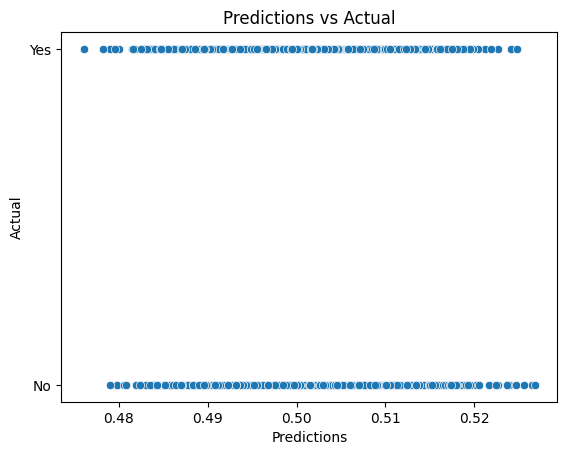

In [96]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Predictions vs Actual')

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

y_test = y_test.map({'Yes': 1, 'No': 0})

print('MSE:', mean_squared_error(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', math.sqrt(mean_squared_error(y_test, predictions)))

MSE: 0.25003495287177147
MAE: 0.4999707513191495
RMSE: 0.5000349516501537


Yes and No which are our desirable predictions cannot be expressed numerically hence the need to offer values to them.

The MSE, MAE and RMSE are preety low whcih is commendable showing that the model I have built is almost accurate

**CONCLUSIONS**

1.Study Hours Per week, Attendance Rate, Previous Grades all are strongly related to the performance of the student exhibiting a linear relationship

2.The Parent Education Level is offly related to the performance of the student showcasing no commendable correlation

2.The Predictive model I have built is accurate in forecasting the passing probability of a student, provided only the factors under study are being utilized because both the MSE, MAE and RMSE are very low.